In [35]:
import pandas as pd
import seaborn as sns

In [37]:
power_df = pd.read_csv("C:/Data set/dataset/power_data.csv")
power_df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [39]:
power_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<Axes: >

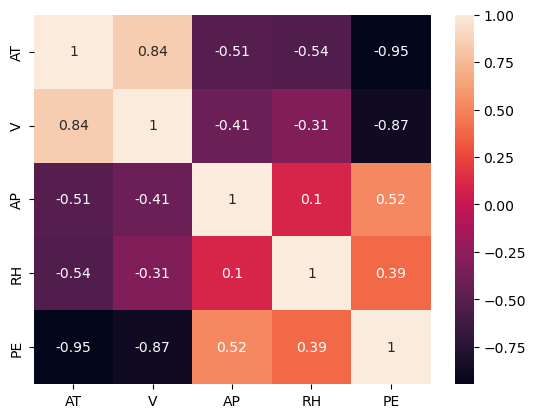

In [41]:
sns.heatmap(power_df.corr(),annot=True)

In [63]:
from sklearn.model_selection import train_test_split
target_y=power_df['PE']
features_x=power_df.drop('PE',axis=1,inplace=False)
train_x,test_x,train_y,test_y=train_test_split(features_x,target_y,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
lr_model=LinearRegression()
lr_pl=Pipeline(steps=[('scaler',StandardScaler()),('lr',lr_model)])
lr_pl.fit(train_x,train_y)
print('c0-efficients:',lr_model.coef_)
print('Intercept:',lr_model.intercept_)

c0-efficients: [-14.74365741  -2.95799395   0.38196274  -2.26829206]
Intercept: 454.54205905408935


In [67]:
from sklearn.metrics import r2_score

In [69]:
predicted_y=lr_pl.predict(test_x)
r2_score(test_y,predicted_y)

0.9331522662745348